# Plotting traffic camera locations in Hong Kong with GeoPandas

In [1]:
import pandas as pd

In [2]:
cameras = pd.read_csv('Traffic_Camera_Locations_En.csv')

In [3]:
cameras.head()

,key,region,description,easting,northing,latitude,longitude,url
0,H429F,Hong Kong Island,Aberdeen Praya Road near Fish Market,833514,812196,22.248525,114.150158,http://tdcctv.data.one.gov.hk/H429F.JPG
1,H210F,Hong Kong Island,Aberdeen Tunnel - Wan Chai Side,836504,815117,22.274906,114.179164,http://tdcctv.data.one.gov.hk/H210F.JPG
2,H421F,Hong Kong Island,Aberdeen Tunnel - Aberdeen Side,836245,812386,22.250244,114.176651,http://tdcctv.data.one.gov.hk/H421F.JPG
3,H422F2,Hong Kong Island,Ap Lei Chau Bridge Road near Aberdeen Police S...,834632,812129,22.247922,114.161003,http://tdcctv.data.one.gov.hk/H422F2.JPG
4,H904F,Hong Kong Island,Canal Road Flyover near Gloucester Road,836731,815614,22.279394,114.181367,http://tdcctv.data.one.gov.hk/H904F.JPG


In [69]:
%%capture
!pip install descartes
!pip install geopandas

In [30]:
from geopandas import GeoDataFrame, points_from_xy

cameras_geo = GeoDataFrame(cameras, geometry=points_from_xy(cameras.longitude, cameras.latitude))

In [13]:
cameras_geo.head()

,key,region,description,easting,northing,latitude,longitude,url,geometry
0,H429F,Hong Kong Island,Aberdeen Praya Road near Fish Market,833514,812196,22.248525,114.150158,http://tdcctv.data.one.gov.hk/H429F.JPG,POINT (114.1501576 22.2485255)
1,H210F,Hong Kong Island,Aberdeen Tunnel - Wan Chai Side,836504,815117,22.274906,114.179164,http://tdcctv.data.one.gov.hk/H210F.JPG,POINT (114.1791642 22.27490622)
2,H421F,Hong Kong Island,Aberdeen Tunnel - Aberdeen Side,836245,812386,22.250244,114.176651,http://tdcctv.data.one.gov.hk/H421F.JPG,POINT (114.1766512 22.25024351)
3,H422F2,Hong Kong Island,Ap Lei Chau Bridge Road near Aberdeen Police S...,834632,812129,22.247922,114.161003,http://tdcctv.data.one.gov.hk/H422F2.JPG,POINT (114.1610034 22.24792186)
4,H904F,Hong Kong Island,Canal Road Flyover near Gloucester Road,836731,815614,22.279394,114.181367,http://tdcctv.data.one.gov.hk/H904F.JPG,POINT (114.1813669 22.2793944)


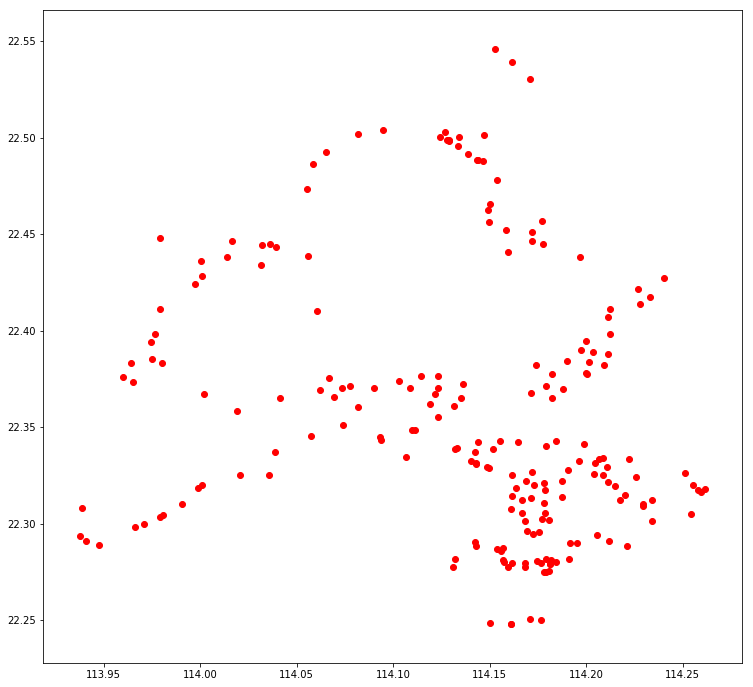

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [19, 12]
cameras_geo.plot(color='red')

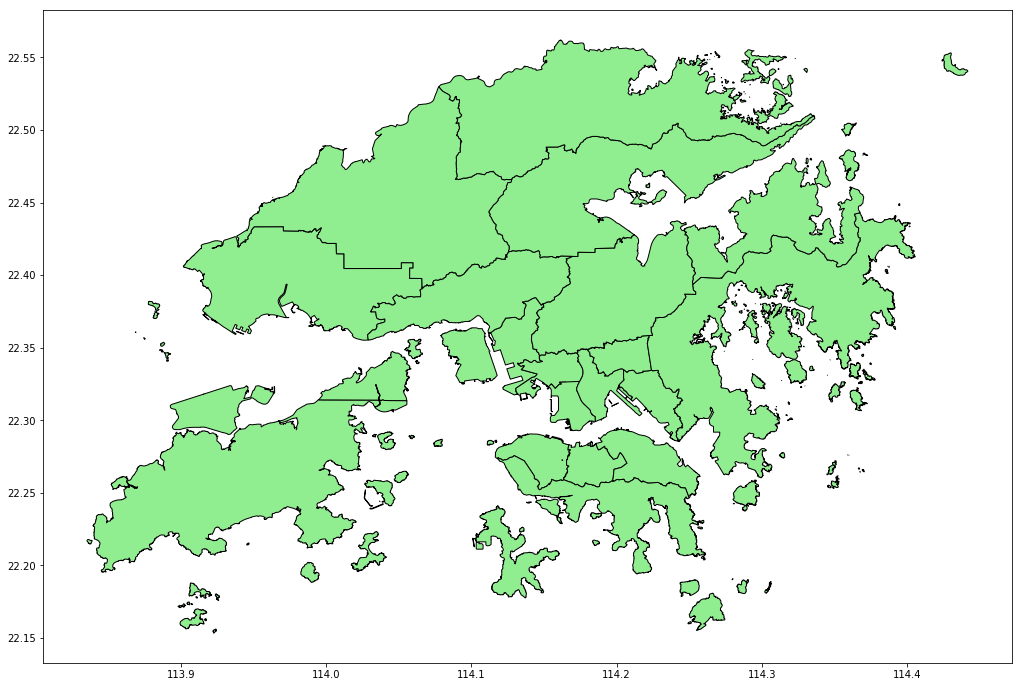

In [65]:
hong_kong = GeoDataFrame.from_file('Hong_Kong_18_Districts/')
hong_kong.plot(color='lightgreen', edgecolor='black')

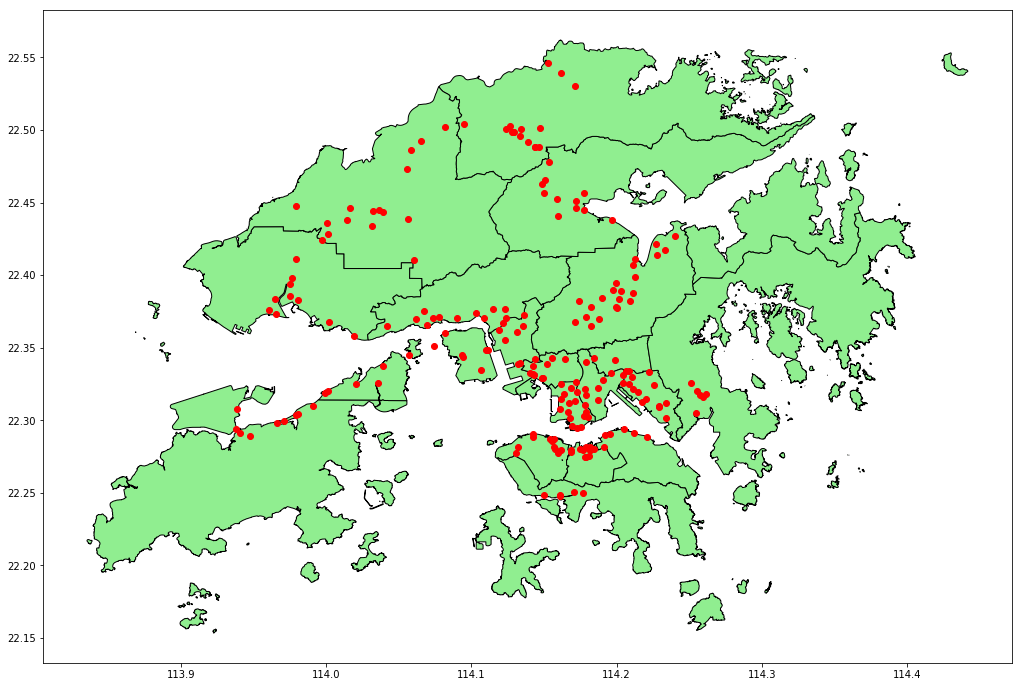

In [66]:
axes = hong_kong.plot(color='lightgreen', edgecolor='black')
cameras_geo.plot(ax=axes, color='red')

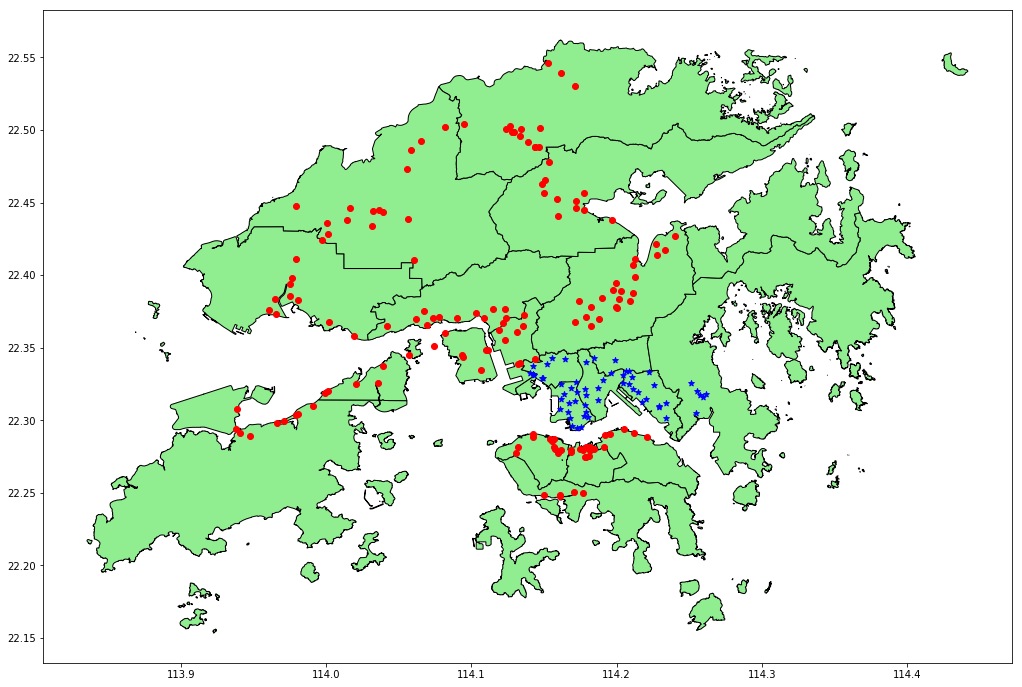

In [71]:
axes = hong_kong.plot(color='lightgreen', edgecolor='black')
cameras_geo[cameras_geo.region == 'Kowloon'].plot(ax=axes, marker='*', color='blue')
cameras_geo[cameras_geo.region != 'Kowloon'].plot(ax=axes, color='red')